In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import os
%matplotlib inline

In [9]:
def process_datetime_columns(df):
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
    df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], errors='coerce')
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name()
    return df

In [3]:
# Define the directory to save plots
save_dir = '../charts'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)


In [4]:
trip_counts_by_day = {day: 0 for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

In [11]:
def calculate_trip_duration(df):
    df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60.0
    return df

In [ ]:
chunk_size = 10000
for chunk in pd.read_csv('../raw_data/merged2_data.csv', chunksize=chunk_size):
    chunk = process_datetime_columns(chunk)
    chunk = calculate_trip_duration(chunk)

    day_counts = chunk['pickup_day_of_week'].value_counts()
    for day, count in day_counts.items():
        trip_counts_by_day[day] += count

In [ ]:
days = list(trip_counts_by_day.keys())
counts = list(trip_counts_by_day.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=days, y=counts)
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Constants
CHUNK_SIZE = 10000

total_duration_by_hour = defaultdict(float)  # Stores total trip durations for each hour
trip_counts_by_hour = defaultdict(int)  # Counts number of trips for each hour
total_revenue_by_hour = defaultdict(float)  # Stores total revenue generated in each hour
rush_hour_trip_counts = defaultdict(int) # Stores number of trips in rush hours
rush_hour_revenue = defaultdict(float) # Stores revenue for rush hours
day_of_week_trip_counts = defaultdict(int) # Stores trips by day of week
day_of_week_revenue = defaultdict(float) # Stores revenue by day of week
borough_trip_counts = defaultdict(int)  # Counts number of trips starting from each borough
borough_revenue = defaultdict(float)  # Stores total revenue generated by trips starting in each borough
zone_trip_counts = defaultdict(int)  # Counts number of trips starting from each zone
zone_revenue = defaultdict(float)  # Stores total revenue generated by trips starting in each zone
location_trip_counts = defaultdict(int)  # Counts number of trips starting from each locaion id
location_revenue = defaultdict(float)  # Stores total revenue generated by trips starting in each location id
weather_vs_revenue = defaultdict(lambda: {"trips": 0, "total_fare": 0, "avg_temp": 0})  # Tracks trips, fare, and average temperature by date
daily_trip_counts = defaultdict(int)  # Counts number of trips for each day
short_trip_counts = defaultdict(int)  # Counts number of short trips by zone
short_trips_revenue = defaultdict(float)  # Stores total revenue for short trips by zone
long_trip_counts = defaultdict(int)  # Counts number of long trips by zone
long_trips_revenue = defaultdict(float)  # Stores total revenue for long trips by zone
distance_by_borough = defaultdict(list)  # Groups trip distances by borough for distribution analysis
charges_by_zone = defaultdict(lambda: {"fare": 0, "trips": 0, "extra": 0, "congestion": 0, "total_amount": 0})  # Tracks fare, extra charges, congestion charges, and total amounts by zone
passenger_counts = defaultdict(int)  # Counts total passengers by number of passengers per trip
passenger_count_by_borough = defaultdict(int)  # Tracks total passengers by borough of origin
payment_type_counts = defaultdict(int)  # Counts trips by payment type
payment_type_revenue = defaultdict(float)  # Tracks revenue by payment type
multi_passenger_trips = defaultdict(int)  # Counts trips with 2 or more passengers
high_fare_trips = []  # Tracks trips with fare amounts above a threshold for outlier analysis
weather_speed_analysis = defaultdict(list) # Tracks relationship between weather conditions and average speed
weather_vs_passenger_count = defaultdict(list) # Tracks how weather conditions influence the number of passengers per trip
fare_per_mile_by_weather = defaultdict(list)# Calculates the average fare per mile for different weather conditions
prcp_vs_distance = defaultdict(list) # Tracks the relationship between precipitation levels and trip distances
congestion_by_weather = defaultdict(list) # Assesses congestion levels under various weather conditions
trip_count_by_weather = defaultdict(list)  # Counts the total number of trips under each weather condition
fare_by_weather = defaultdict(list) # Calculates fare by weather
fare_per_passenger_by_weather = defaultdict(list)  # Stores fare per passenger by weather conditions
median_trip_duration_by_weather = defaultdict(list)  # Stores median trip duration by weather conditions
median_trip_distance_by_weather = defaultdict(list)  # Stores median trip distance by weather conditions
passenger_count_stats_by_weather = defaultdict(list)  # Stores stats (mean, median, std) of passenger counts by weather
trip_duration_vs_distance_by_weather = defaultdict(list)  # Stores correlation of trip duration vs distance by weather conditions
fare_amount_stats_by_weather = defaultdict(list)  # Stores statistics (mean, median, std, min, max) of fare amounts by weather
correlation_matrix = defaultdict(list)  # Stores correlation matrix for fare_amount, trip_distance, speed, and passenger_count
trip_count_by_hour = defaultdict(list)  # Stores trip count by hour of the day
weather_condition_frequency = defaultdict(list)  # Stores frequency of weather conditions (prcp, snow)

trip_distances = []  # List of all trip distances for overall distribution analysis
fare_amounts = []  # List of all fare amounts for fare analysis
extra_charges = []  # List of extra charges applied to trips
congestion_charges = []  # List of congestion surcharge values
distance_vs_fare = []  # Stores pairs of (trip_distance, fare_amount) for correlation analysis
distance_vs_congestion = []  # Stores pairs of (trip_distance, congestion_surcharge)
fare_vs_extra = []  # Stores pairs of (fare_amount, extra_charges)
fare_vs_total_amount = []  # Stores pairs of (fare_amount, total_amount) to analyze additional charges
fare_per_passenger = defaultdict(list)  # Stores fare amounts grouped by passenger count
hourly_congestion = defaultdict(float)  # Tracks total congestion charges by hour
average_distance_by_hour = defaultdict(list)  # Stores trip distances grouped by hour to calculate averages
average_fare_by_hour = defaultdict(list)  # Stores fare amounts grouped by hour to calculate averages
rainy_day_trips = defaultdict(int)  # Counts trips on rainy days
fare_vs_precipitation = defaultdict(list)  # Groups fare amounts by precipitation levels
fare_per_mile = []  # Stores fare divided by distance for efficiency analysis
daily_avg_duration = defaultdict(lambda: {"total_duration": 0, "trip_count": 0})  # Tracks total duration and count for average calculation by day
taxi_type_fare = defaultdict(float)  # Tracks total fare by taxi type (green or yellow)
speed_estimates = [] # Estimates of speed
tip_percentages = [] # Count tips
fare_per_mile = [] # Fare received for every mile


In [ ]:
chunk_count = 0
# First loop for temporal, hourly, and day of the week analyses
for chunk in pd.read_csv('../raw_data/merged2_data.csv', chunksize=CHUNK_SIZE, parse_dates=['pickup_datetime', 'dropoff_datetime']):

    # Zone and borough analysis
    borough_counts = chunk['PUBorough'].value_counts()
    borough_revenues = chunk.groupby('PUBorough')['fare_amount'].sum()
    for borough, count in borough_counts.items():
        borough_trip_counts[borough] += count
        borough_revenue[borough] += borough_revenues.get(borough, 0)

    zone_counts = chunk['PUZone'].value_counts()
    zone_revenues = chunk.groupby('PUZone')['fare_amount'].sum()
    for zone, count in zone_counts.items():
        zone_trip_counts[zone] += count
        zone_revenue[zone] += zone_revenues.get(zone, 0)

    location_counts = chunk['location_id'].value_counts()
    location_revenues = chunk.groupby('location_id')['fare_amount'].sum()
    for location, count in location_counts.items():
        location_trip_counts[location] += count
        location_revenue[location] += location_revenues.get(zone, 0)


    # Calculate trip duration in minutes
    chunk['trip_duration'] = (chunk['dropoff_datetime'] - chunk['pickup_datetime']).dt.total_seconds() / 60.0

    # Extract temporal information
    chunk['pickup_hour'] = chunk['pickup_datetime'].dt.hour
    chunk['day_of_week'] = chunk['pickup_datetime'].dt.day_name()

    # Hourly duration, revenue, and counts
    hourly_duration = chunk.groupby('pickup_hour')['trip_duration'].sum()
    hourly_revenue = chunk.groupby('pickup_hour')['fare_amount'].sum()
    hourly_counts = chunk['pickup_hour'].value_counts()
    for hour in range(24):
        total_duration_by_hour[hour] += hourly_duration.get(hour, 0)
        total_revenue_by_hour[hour] += hourly_revenue.get(hour, 0)
        trip_counts_by_hour[hour] += hourly_counts.get(hour, 0)

    # Rush hour analysis
    for hour in [6, 7, 8, 9, 15, 16, 17, 18]:
        rush_hour_trip_counts[hour] += hourly_counts.get(hour, 0)
        rush_hour_revenue[hour] += hourly_revenue.get(hour, 0)

    # Day of the week analysis
    day_of_week_counts = chunk['day_of_week'].value_counts()
    day_of_week_revenues = chunk.groupby('day_of_week')['fare_amount'].sum()
    for day, count in day_of_week_counts.items():
        day_of_week_trip_counts[day] += count
        day_of_week_revenue[day] += day_of_week_revenues.get(day, 0)

    # Weather vs revenue
    daily_weather = chunk.groupby(chunk['pickup_datetime'].dt.date).agg({'fare_amount': 'sum', 'tavg': 'first'})
    for date, row in daily_weather.iterrows():
        weather_vs_revenue[date]['trips'] += daily_trip_counts[date]
        weather_vs_revenue[date]['total_fare'] += row['fare_amount']
        weather_vs_revenue[date]['avg_temp'] = row['tavg']


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# First Section: Temporal, Hourly, and Day of Week Analyses
hours = list(range(24))  # x-axis (hours of the day)
hourly_duration_values = [total_duration_by_hour[hour] for hour in hours]  # y-axis (values)
hourly_revenue_values = [total_revenue_by_hour[hour] for hour in hours]  # y-axis (values)
hourly_trip_counts = [trip_counts_by_hour[hour] for hour in hours]  # y-axis (values)

# Plot the total trip duration by hour
plt.figure(figsize=(10, 6))
plt.plot(hours, hourly_duration_values, marker='o', linestyle='-', color='b', label='Total Duration')
plt.title('Total Trip Duration by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Duration (Minutes)')
plt.grid(True)
plt.xticks(hours)
plt.legend()
plt.savefig('../charts/total_trip_duration_by_hour.png')
plt.close()

# Hourly Revenue
plt.figure(figsize=(10, 6))
plt.plot(hours, hourly_revenue_values, marker='o', linestyle='-', color='g', label='Total Revenue')
plt.title('Total Revenue by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.xticks(hours)
plt.legend()
plt.savefig('../charts/total_revenue_by_hour.png')
plt.close()

# Plot the total trip count by hour
plt.figure(figsize=(10, 6))
plt.plot(hours, hourly_trip_counts, marker='o', linestyle='-', color='b', label='Total Duration')
plt.title('Total Trip Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Trips')
plt.grid(True)
plt.xticks(hours)
plt.legend()
plt.savefig('../charts/total_trip_count_by_hour.png')
plt.close()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Sort the keys and values by day_order
day_sorted_keys = [day for day in day_order if day in day_of_week_revenue]
day_sorted_values = [day_of_week_revenue[day] for day in day_sorted_keys]
day_sorted_values2 = [day_of_week_trip_counts[day] for day in day_sorted_keys]


# Day of Week Count
plt.figure(figsize=(10, 6))
sns.barplot(x=day_sorted_keys, y=day_sorted_values2)
plt.title('Trip Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Trips')
plt.xticks(rotation=45)
plt.savefig('../charts/trip_count_by_day_of_week.png')
plt.close()

# Day of Week Revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=day_sorted_keys, y=day_sorted_values)
plt.title('Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.savefig('../charts/revenue_by_day_of_week.png')
plt.close()

# Extract hours, trip counts, and revenue
hours = list(rush_hour_trip_counts.keys())
trip_counts = list(rush_hour_trip_counts.values())
revenue = list(rush_hour_revenue.values())

# Plotting Rush Hour Trip Counts
plt.figure(figsize=(10, 6))
plt.plot(hours, trip_counts, marker='o', linestyle='-', color='b', label='Trip Counts')
plt.title('Rush Hour Trip Counts')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(hours)  # Ensure only rush hours are labeled on x-axis
plt.legend()
plt.savefig('../charts/rush_hour_trip_counts.png')
plt.close()

# Plotting Rush Hour Revenue
plt.figure(figsize=(10, 6))
plt.plot(hours, revenue, marker='o', linestyle='-', color='g', label='Revenue')
plt.title('Rush Hour Revenue')
plt.xlabel('Hour of Day')
plt.ylabel('Revenue ($)')
plt.xticks(hours)  # Ensure only rush hours are labeled on x-axis
plt.legend()
plt.savefig('../charts/rush_hour_revenue.png')
plt.close()


# Plotting Borough Trip Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=list(borough_trip_counts.keys()), y=list(borough_trip_counts.values()))
plt.title('Trip Counts by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../charts/borough_trip_counts.png')
plt.close()

# Plotting Borough Revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=list(borough_revenue.keys()), y=list(borough_revenue.values()))
plt.title('Revenue by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../charts/borough_revenue.png')
plt.close()



# Plotting Zone Trip Counts (after excluding outliers, with log scale)
plt.figure(figsize=(200, 6))
sns.barplot(x=list(zone_trip_counts.keys()), y=list(zone_trip_counts.values()))
plt.title('Trip Counts by Zone (Excluding Largest Two Outliers)')
plt.xlabel('Zone')
plt.ylabel('Total Trips')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../charts/zone_trip_counts.png')
plt.close()

# Plotting Zone Revenue (after excluding outliers, with log scale)
plt.figure(figsize=(200, 6))
sns.barplot(x=list(zone_revenue.keys()), y=list(zone_revenue.values()))
plt.title('Revenue by Zone (Excluding Largest Two Outliers)')
plt.xlabel('Zone')
plt.ylabel('Total Revenue ($)')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../charts/zone_revenue.png')
plt.close()

# Filter the weather_vs_revenue dictionary for the year 2021
weather_2021 = {date: data for date, data in weather_vs_revenue.items() if date.year == 2021}

# Prepare data for plotting
dates = list(weather_2021.keys())  # Dates from the dictionary (only for 2021)
total_fare = [weather_2021[date]['total_fare'] for date in dates]  # Total fare values
avg_temp = [weather_2021[date]['avg_temp'] for date in dates]  # Average temperature values

# Plot 1: Total Fare vs Date
plt.figure(figsize=(10, 6))
plt.plot(dates, total_fare, color='b', marker='o', label='Total Fare ($)', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Fare ($)', color='b')
plt.title('Total Fare vs Date (2021)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
fare_output_path = '../charts/total_fare_vs_date_2021.png'
plt.savefig(fare_output_path)  # Save the figure as a .png file
plt.close()  # Close the current figure to free up memory

# Plot 2: Average Temperature vs Date
plt.figure(figsize=(10, 6))
plt.plot(dates, avg_temp, color='r', marker='s', label='Average Temperature (°C)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)', color='r')
plt.title('Average Temperature vs Date (2021)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
temp_output_path = '../charts/avg_temp_vs_date_2021.png'
plt.savefig(temp_output_path)  # Save the figure as a .png file
plt.close()  # Close the current figure to free up memory

# Group fares by rounded temperature degree
temp_fare_map = defaultdict(float)  # To store total fare for each rounded temperature degree
for date, data in weather_2021.items():
    temp = round(data['avg_temp'])  # Round the temperature to nearest integer
    fare = data['total_fare']
    temp_fare_map[temp] += fare

# Sorting temperature degrees to get a proper x-axis for plotting
sorted_temps = sorted(temp_fare_map.keys())
sorted_fares = [temp_fare_map[temp] for temp in sorted_temps]

# Plotting the fare per rounded temperature degree
plt.figure(figsize=(10, 6))
plt.plot(sorted_temps, sorted_fares, marker='o', linestyle='-', color='b')
plt.title('Total Fare vs Rounded Temperature (2021)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Fare ($)')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlap

# Save the plot
plt.savefig('../charts/fare_vs_rounded_temperature_2021.png')
plt.close()

In [ ]:
for chunk in pd.read_csv('../raw_data/merged2_data.csv', chunksize=CHUNK_SIZE, parse_dates=['pickup_datetime', 'dropoff_datetime']):

    # Calculate trip duration in minutes
    chunk['trip_duration'] = (chunk['dropoff_datetime'] - chunk['pickup_datetime']).dt.total_seconds() / 60.0

    # Extract temporal information
    chunk['pickup_hour'] = chunk['pickup_datetime'].dt.hour
    chunk['day_of_week'] = chunk['pickup_datetime'].dt.day_name()

    # Short trips (less than 1 mile)
    # Filter short trips (distance < 1 mile)
    short_trips = chunk[chunk['trip_distance'] < 1]
    for zone in short_trips['PUZone']:
        short_trip_counts[zone] += 1

    # Add revenue for short trips
    short_trip_revenues = short_trips.groupby('PUZone')['fare_amount'].sum()
    for zone, revenue in short_trip_revenues.items():
        short_trips_revenue[zone] += revenue

    # Filter long trips (distance > threshold, e.g., 10 miles)
    long_trips = chunk[chunk['trip_distance'] > 30]
    for zone in long_trips['PUZone']:
        long_trip_counts[zone] += 1

    # Add revenue for long trips
    long_trip_revenues = long_trips.groupby('PUZone')['fare_amount'].sum()
    for zone, revenue in long_trip_revenues.items():
        long_trips_revenue[zone] += revenue

    # Append distances and charges by borough/zone
    for index, row in chunk.iterrows():
        distance_by_borough[row['PUBorough']].append(row['trip_distance'])
        charges_by_zone[row['PUZone']]['fare'] += row['fare_amount']
        charges_by_zone[row['PUZone']]['trips'] += 1
        charges_by_zone[row['PUZone']]['extra'] += row['extra']
        charges_by_zone[row['PUZone']]['congestion'] += row['congestion_surcharge']
        charges_by_zone[row['PUZone']]['total_amount'] += row['total_amount']

    # Additional analyses: Passenger counts, payment types, high fare trips, rainy day trips, etc.
    passenger_counts.update(chunk['passenger_count'].value_counts())
    passenger_count_by_borough.update(chunk.groupby('PUBorough')['passenger_count'].sum())

    payment_type_counts.update(chunk['payment_type'].value_counts())
    payment_type_revenue.update(chunk.groupby('payment_type')['fare_amount'].sum())

    multi_passenger_trips.update(chunk[chunk['passenger_count'] > 1].groupby('pickup_hour').size())

    # High fare trips (example threshold, adjust as needed)
    high_fare_threshold = 70
    high_fare_trips.extend(chunk[chunk['fare_amount'] > high_fare_threshold].to_dict('records'))

    # Rainy day trips
    rainy_day_trips = chunk[chunk['prcp'] > 0]
    rainy_day_counts = rainy_day_trips.groupby('pickup_hour').size()
    rainy_day_revenue = rainy_day_trips.groupby('pickup_hour')['fare_amount'].sum()


In [ ]:
# Rainy Day Trips - Counts by Pickup Hour
plt.figure(figsize=(12, 6))
rainy_day_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Rainy Day Trips - Counts by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Trip Counts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../charts/rainy_day_trip_counts.png')
plt.close()

# Rainy Day Trips - Revenue by Pickup Hour
plt.figure(figsize=(12, 6))
rainy_day_revenue.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Rainy Day Trips - Revenue by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../charts/rainy_day_trip_revenue.png')
plt.close()


In [18]:
for chunk in pd.read_csv('../raw_data/merged2_data.csv', chunksize=CHUNK_SIZE, parse_dates=['pickup_datetime', 'dropoff_datetime']):

    # Calculate additional columns
    chunk['trip_duration'] = (chunk['dropoff_datetime'] - chunk['pickup_datetime']).dt.total_seconds() / 60.0  # duration in minutes

    # Filter out rows where trip_distance or trip_duration are zero to avoid division by zero
    chunk = chunk[chunk['trip_distance'] != 0]
    chunk = chunk[chunk['trip_duration'] != 0]

    # Extract temporal information
    chunk['pickup_hour'] = chunk['pickup_datetime'].dt.hour
    chunk['day_of_week'] = chunk['pickup_datetime'].dt.day_name()

    # Calculate derived columns
    chunk['speed'] = chunk['trip_distance'] / (chunk['trip_duration'] / 60)  # speed in mph
    chunk['fare_per_mile'] = chunk['fare_amount'] / chunk['trip_distance']
    chunk['fare_per_passenger'] = chunk['fare_amount'] / chunk['passenger_count']

    # Grouping and aggregating metrics
    weather_speed_analysis_chunk = chunk.groupby(['prcp', 'snow'])['speed'].mean()
    weather_vs_passenger_count_chunk = chunk.groupby(['prcp', 'snow'])['passenger_count'].sum()
    fare_per_mile_by_weather_chunk = chunk.groupby(['prcp', 'snow'])['fare_per_mile'].mean()
    prcp_vs_distance_chunk = chunk.groupby('prcp')['trip_distance'].mean()
    congestion_by_weather_chunk = chunk.groupby(['prcp', 'snow'])['congestion_surcharge'].sum()
    trip_count_by_weather_chunk = chunk.groupby(['prcp', 'snow']).size()
    fare_by_weather_chunk = chunk.groupby(['prcp', 'snow'])['fare_amount'].sum()
    median_trip_duration_by_weather_chunk = chunk.groupby(['prcp', 'snow'])['trip_duration'].median()
    median_trip_distance_by_weather_chunk = chunk.groupby(['prcp', 'snow'])['trip_distance'].median()
    passenger_count_stats_by_weather_chunk = chunk.groupby(['prcp', 'snow'])['passenger_count'].agg(['mean', 'median', 'std'])
    trip_duration_vs_distance_by_weather_chunk = chunk.groupby(['prcp', 'snow']).apply(lambda x: x[['trip_duration', 'trip_distance']].corr().iloc[0, 1])
    fare_amount_stats_by_weather_chunk = chunk.groupby(['prcp', 'snow'])['fare_amount'].agg(['mean', 'median', 'std', 'min', 'max'])
    correlation_matrix_chunk = chunk[['fare_amount', 'trip_distance', 'speed', 'passenger_count']].corr()
    trip_count_by_hour_chunk = chunk.groupby('pickup_hour').size()
    weather_condition_frequency_chunk = chunk.groupby(['prcp', 'snow']).size()
    fare_per_passenger_by_weather_chunk = chunk.groupby(['prcp', 'snow'])['fare_per_passenger'].mean()

    # Append chunk results to aggregated data
    for key, value in weather_speed_analysis_chunk.items():
        weather_speed_analysis.setdefault(key, []).append(value)
    for key, value in weather_vs_passenger_count_chunk.items():
        weather_vs_passenger_count.setdefault(key, []).append(value)
    for key, value in fare_per_mile_by_weather_chunk.items():
        fare_per_mile_by_weather.setdefault(key, []).append(value)
    for key, value in prcp_vs_distance_chunk.items():
        prcp_vs_distance.setdefault(key, []).append(value)
    for key, value in congestion_by_weather_chunk.items():
        congestion_by_weather.setdefault(key, []).append(value)
    for key, value in trip_count_by_weather_chunk.items():
        trip_count_by_weather.setdefault(key, []).append(value)
    for key, value in fare_by_weather_chunk.items():
        fare_by_weather.setdefault(key, []).append(value)
    for key, value in fare_per_passenger_by_weather_chunk.items():
        fare_per_passenger_by_weather.setdefault(key, []).append(value)
    for key, value in median_trip_duration_by_weather_chunk.items():
        median_trip_duration_by_weather.setdefault(key, []).append(value)
    for key, value in median_trip_distance_by_weather_chunk.items():
        median_trip_distance_by_weather.setdefault(key, []).append(value)
    for key, value in passenger_count_stats_by_weather_chunk.items():
        passenger_count_stats_by_weather.setdefault(key, []).append(value)
    for key, value in trip_duration_vs_distance_by_weather_chunk.items():
        trip_duration_vs_distance_by_weather.setdefault(key, []).append(value)
    for key, value in fare_amount_stats_by_weather_chunk.items():
        fare_amount_stats_by_weather.setdefault(key, []).append(value)
    for key, value in correlation_matrix_chunk.items():
        correlation_matrix.setdefault(key, []).append(value)
    for key, value in trip_count_by_hour_chunk.items():
        trip_count_by_hour.setdefault(key, []).append(value)
    for key, value in weather_condition_frequency_chunk.items():
        weather_condition_frequency.setdefault(key, []).append(value)

# Combine chunk results into final aggregated data
final_weather_speed_analysis = {k: sum(v) / len(v) for k, v in weather_speed_analysis.items()}
final_weather_vs_passenger_count = {k: sum(v) for k, v in weather_vs_passenger_count.items()}
final_fare_per_mile_by_weather = {k: sum(v) / len(v) for k, v in fare_per_mile_by_weather.items()}
final_prcp_vs_distance = {k: sum(v) / len(v) for k, v in prcp_vs_distance.items()}
final_congestion_by_weather = {k: sum(v) for k, v in congestion_by_weather.items()}
final_trip_count_by_weather = {k: sum(v) for k, v in trip_count_by_weather.items()}
final_fare_by_weather = {k: sum(v) for k, v in fare_by_weather.items()}
final_fare_per_passenger_by_weather = {k: sum(v) / len(v) for k, v in fare_per_passenger_by_weather.items()}
final_median_trip_duration_by_weather = {k: sum(v) / len(v) for k, v in median_trip_duration_by_weather.items()}
final_median_trip_distance_by_weather = {k: sum(v) / len(v) for k, v in median_trip_distance_by_weather.items()}
final_passenger_count_stats_by_weather = {k: sum(v) / len(v) for k, v in passenger_count_stats_by_weather.items()}
final_trip_duration_vs_distance_by_weather = {k: sum(v) / len(v) for k, v in trip_duration_vs_distance_by_weather.items()}
final_fare_amount_stats_by_weather = {k: sum(v) / len(v) for k, v in fare_amount_stats_by_weather.items()}
final_correlation_matrix = {k: sum(v) / len(v) for k, v in correlation_matrix.items()}
final_trip_count_by_hour = {k: sum(v) for k, v in trip_count_by_hour.items()}
final_weather_condition_frequency = {k: sum(v) for k, v in weather_condition_frequency.items()}


/tmp/ipykernel_43864/9911131.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  for chunk in pd.read_csv('../raw_data/merged2_data.csv', chunksize=CHUNK_SIZE, parse_dates=['pickup_datetime', 'dropoff_datetime']):
/tmp/ipykernel_43864/9911131.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trip_duration_vs_distance_by_weather_chunk = chunk.groupby(['prcp', 'snow']).apply(lambda x: x[['trip_duration', 'trip_distance']].corr().iloc[0, 1])
/tmp/ipykernel_43864/9911131.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This b

ValueError: Names should be list-like for a MultiIndex

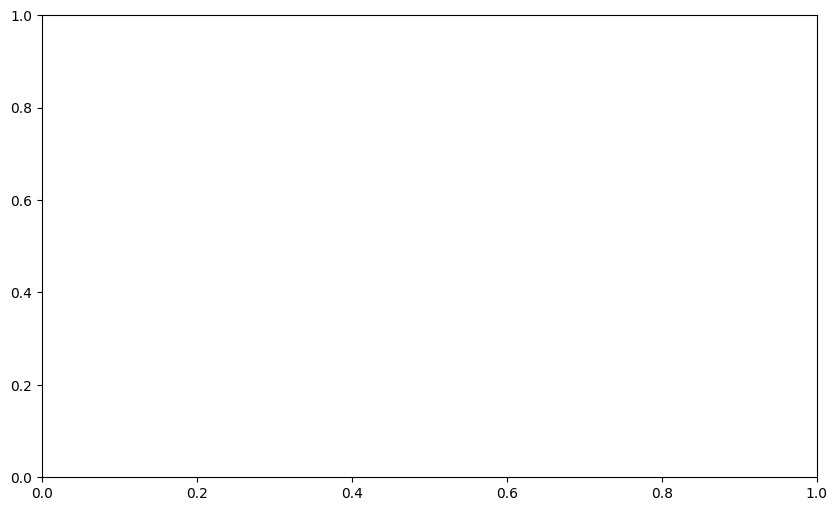

In [19]:

def save_plot(plot_name):
    """Save the current plot to the charts directory."""
    plt.tight_layout()
    plt.savefig(os.path.join("../charts", f"{plot_name}.png"))
    plt.close()

# Helper function to plot bar charts
def plot_bar_chart(data, title, xlabel, ylabel, filename, rotation=45):
    keys = [str(k) for k in data.keys()]  # Convert keys to strings for plotting
    values = list(data.values())

    plt.figure(figsize=(10, 6))
    sns.barplot(x=keys, y=values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    save_plot(filename)

# 1. Weather Speed Analysis
plot_bar_chart(
    final_weather_speed_analysis,
    "Average Speed by Weather Conditions",
    "Weather Conditions (prcp, snow)",
    "Average Speed (mph)",
    "weather_speed_analysis"
)

# 2. Weather vs Passenger Count
plot_bar_chart(
    final_weather_vs_passenger_count,
    "Passenger Count by Weather Conditions",
    "Weather Conditions (prcp, snow)",
    "Total Passenger Count",
    "weather_vs_passenger_count"
)

# 3. Fare Per Mile by Weather
plot_bar_chart(
    final_fare_per_mile_by_weather,
    "Average Fare Per Mile by Weather Conditions",
    "Weather Conditions (prcp, snow)",
    "Fare Per Mile ($)",
    "fare_per_mile_by_weather"
)

# 4. Precipitation vs Distance
plot_bar_chart(
    final_prcp_vs_distance,
    "Average Trip Distance by Precipitation",
    "Precipitation (prcp)",
    "Average Trip Distance (miles)",
    "prcp_vs_distance",
    rotation=0
)

# 5. Congestion by Weather
plot_bar_chart(
    final_congestion_by_weather,
    "Congestion Surcharge by Weather Conditions",
    "Weather Conditions (prcp, snow)",
    "Total Congestion Surcharge ($)",
    "congestion_by_weather"
)

# 6. Trip Count by Weather
plot_bar_chart(
    final_trip_count_by_weather,
    "Trip Count by Weather Conditions",
    "Weather Conditions (prcp, snow)",
    "Number of Trips",
    "trip_count_by_weather"
)

# 7. Fare by Weather
plot_bar_chart(
    final_fare_by_weather,
    "Total Fare by Weather Conditions",
    "Weather Conditions (prcp, snow)",
    "Total Fare Amount ($)",
    "fare_by_weather"
)

# 8. Fare Per Passenger by Weather
plot_bar_chart(
    final_fare_per_passenger_by_weather,
    "Fare Per Passenger by Weather Conditions",
    "Weather Conditions (prcp, snow)",
    "Fare Per Passenger ($)",
    "fare_per_passenger_by_weather"
)

# 9. Median Trip Duration by Weather
plot_bar_chart(
    final_median_trip_duration_by_weather,
    "Median Trip Duration by Weather Conditions",
    "Weather Conditions (prcp, snow)",
    "Median Trip Duration (minutes)",
    "median_trip_duration_by_weather"
)

# 10. Median Trip Distance by Weather
plot_bar_chart(
    final_median_trip_distance_by_weather,
    "Median Trip Distance by Weather Conditions",
    "Weather Conditions (prcp, snow)",
    "Median Trip Distance (miles)",
    "median_trip_distance_by_weather"
)

# 11. Passenger Count Stats by Weather (Mean)
plot_bar_chart(
    {k: v["mean"] for k, v in final_passenger_count_stats_by_weather.items()},
    "Mean Passenger Count by Weather Conditions",
    "Weather Conditions (prcp, snow)",
    "Mean Passenger Count",
    "mean_passenger_count_by_weather"
)

# 12. Trip Duration vs Distance Correlation by Weather
plot_bar_chart(
    final_trip_duration_vs_distance_by_weather,
    "Correlation Between Trip Duration and Distance by Weather",
    "Weather Conditions (prcp, snow)",
    "Correlation Coefficient",
    "trip_duration_vs_distance_by_weather"
)

# 13. Fare Amount Stats by Weather (Mean)
plot_bar_chart(
    {k: v["mean"] for k, v in final_fare_amount_stats_by_weather.items()},
    "Mean Fare Amount by Weather Conditions",
    "Weather Conditions (prcp, snow)",
    "Mean Fare Amount ($)",
    "mean_fare_amount_by_weather"
)

# 14. Trip Count by Hour
plt.figure(figsize=(10, 6))
sns.barplot(x=list(final_trip_count_by_hour.keys()), y=list(final_trip_count_by_hour.values()))
plt.title("Trip Count by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
save_plot("trip_count_by_hour")

# 15. Weather Condition Frequency
plot_bar_chart(
    final_weather_condition_frequency,
    "Frequency of Weather Conditions",
    "Weather Conditions (prcp, snow)",
    "Frequency",
    "weather_condition_frequency"
)
